In [3]:
%matplotlib inline

import pystan
import pystan_tools as pst
import smearing_tools as st
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
import seaborn as sns
import numpy as np
from math import *
mpl.style.use('fivethirtyeight')
mpl.rc('font', size=18)
mpl.rc('axes', titlesize=18)
mpl.rc('legend', fontsize=18)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)




In [35]:
#generate data
model = pst.compile_model('generate_data.stan')
genparms = dict(N=10000, ttheta=0.7854, tdelta=2.4e-3, L=1300.,
               f_alpha=3.01, f_shift=0.33, f_beta=0.75)
fit = model.sampling(data=genparms, seed=8675309, algorithm='Fixed_param', iter=1, chains=1)

data=dict(y=fit.extract()['E_meas'][0,:],
          yunosc=fit.extract()['E_true'][0,:])

Using cached StanModel


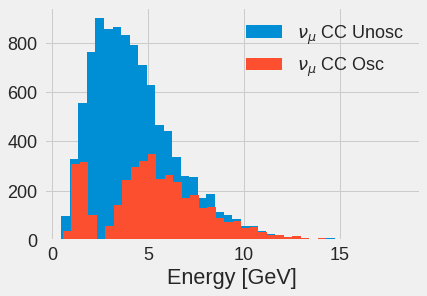

In [36]:
plt.hist([x for x in data['yunosc'] if x>0.], bins=40, label="$\\nu_\\mu$ CC Unosc")
plt.hist([x for x in data['y'] if x>0.], bins=40, label="$\\nu_\\mu$ CC Osc")
plt.xlabel('Energy [GeV]')
plt.legend()
plt.show()

In [48]:
sm= pst.compile_model('modelB.stan')
smdata = dict(N=10000, L=1300.,y=data['y'],
               f_alpha=3.01, f_shift=0.33, f_beta=0.75)
fitA = sm.sampling(data=smdata, iter=1000, chains=4)
fitA.plot()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c02a5a7f55d6c70ae4716113d97c9e26 NOW.


RuntimeError: Initialization failed.